# 1. Import necessary libraries

In [1]:
import pandas as pd        # Data manipulation
import numpy as np         # Numerical operations
import math                # Mathematical functions

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data preprocessing
from sklearn.impute import SimpleImputer       # Handle missing values
from sklearn.preprocessing import StandardScaler  # Feature scaling

# Model training
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Hyperparameter tuning
from sklearn.model_selection import StratifiedKFold, GridSearchCV, RandomizedSearchCV

# Model evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

# Handle class imbalance
from imblearn.over_sampling import SMOTE

**Insights**

* Enables loading, cleaning, and exploring water quality data
* Supports visual analysis to understand patterns and relationships
* Handles missing values and scales features for better model performance
* Splits data into training and testing sets for fair evaluation
* Trains multiple machine learning models for comparison
* Optimizes models using hyperparameter tuning
* Evaluates model performance using accuracy and classification metrics
* Ensures reliable prediction of water potability

---
# 2. Import Water Potability Dataset

In [4]:
df = pd.read_csv("water_potability.csv")
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


- Reads the CSV file water_potability.csv and stores it as a pandas DataFrame named df.

- Displays the entire DataFrame in the notebook or console.

---
# 3. Exploratory Data Analysis (EDA)

In [7]:
df.info() # displays the number of rows, columns, data types, and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


**Insights:**

- Shows missing values and column types.

- Helps plan preprocessing steps.

In [9]:
df.dtypes #  displays the data type of each column in the DataFrame

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

**Insights:**
- Helps identify which columns are numeric or categorical.
- Useful for deciding preprocessing steps like scaling or encoding.

In [11]:
df.shape # shows the number of rows and columns in the DataFrame

(3276, 10)

**Insights:**
- Quickly tells the size of the dataset.
- Useful for understanding the scope of analysis or modeling.

---
## Check unique values in each column

In [14]:
df.nunique() # returns the number of unique values in each column of the DataFrame

ph                 2785
Hardness           3276
Solids             3276
Chloramines        3276
Sulfate            2495
Conductivity       3276
Organic_carbon     3276
Trihalomethanes    3114
Turbidity          3276
Potability            2
dtype: int64

**Insights:**
- Helps identify categorical vs numeric features.
- Useful for detecting columns with low or high variability.

---
## Check missing values

In [17]:
missing = df.isnull().any().sum() # counts the total number of columns that have at least one missing value
missing

3

**Insights:**
- Quickly identifies how many columns need imputation or cleaning.

In [19]:
columns = df.isnull().sum() # calculates the number of missing values in each column
columns

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

**Insights:**
- Helps identify which columns have missing data.
- Useful for deciding imputation or removal strategies.

In [21]:
df['Potability'].value_counts() # counts the number of occurrences of each unique value in the Potability column

Potability
0    1998
1    1278
Name: count, dtype: int64

**Insights:**
- Shows the distribution of the target variable (safe vs unsafe water).
- Helps check for class imbalance before model training.

---
## Check duplicate values

In [24]:
duplicate = df.duplicated().sum() # counts the total number of duplicate rows
duplicate 

0

**Insights:**
- Helps identify redundant data that may affect model performance.
- Useful for cleaning the dataset before analysis or training.

---
## Descriptive statistics

In [27]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


**Insights:**
- Provides summary statistics for numeric columns, including count, mean, standard deviation, min, max, and quartiles.
- Gives a quick overview of data distribution and range.
- Useful for spotting outliers and understanding feature scale.

---
# 4. Data Visualisation

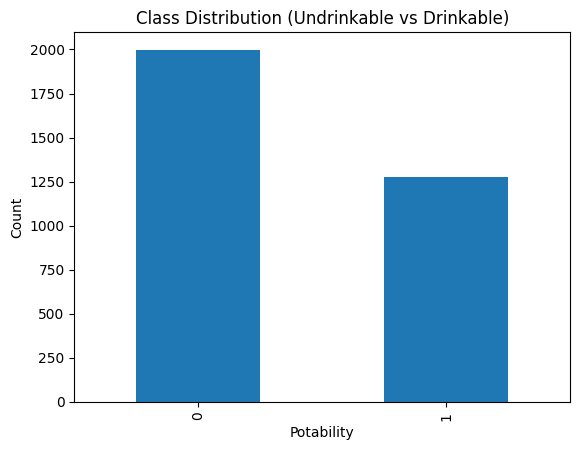

In [30]:
df['Potability'].value_counts().plot(kind='bar') # creates a bar chart showing the count of each class in the Potability column
plt.title("Class Distribution (Undrinkable vs Drinkable)")
plt.xlabel("Potability")
plt.ylabel("Count")
plt.show()

**Insights:**
- Visually shows the distribution of safe vs unsafe water.
- Helps detect class imbalance before model training.

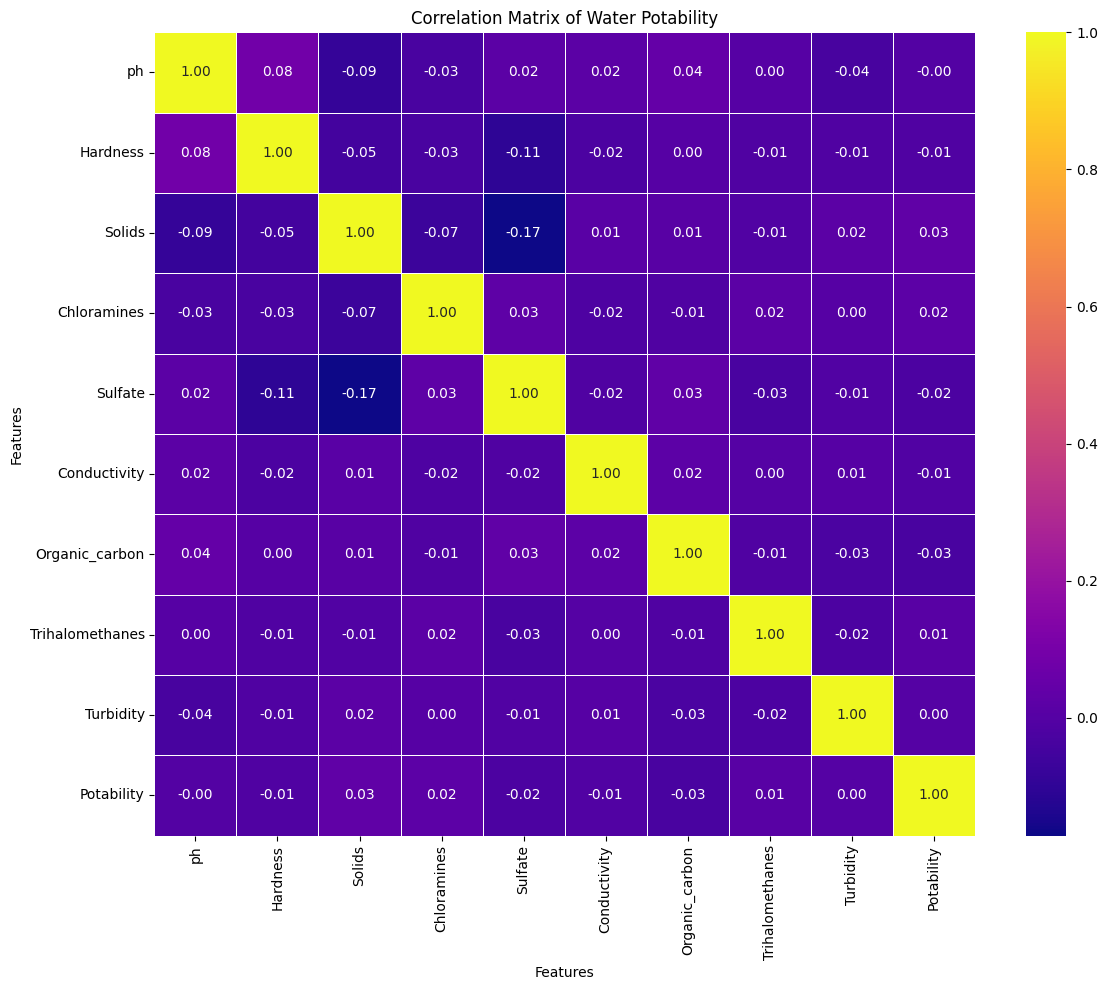

In [32]:
# Compute correlation matrix for numeric columns
correlation_matrix = df.corr(numeric_only=True) # computes the correlation coefficients between numeric columns (values range from -1 to 1)  

# Plot the heatmap
plt.figure(figsize=(12, 10)) # Set figure size
sns.heatmap(correlation_matrix, # plots a heatmap of the correlation matrix with annotations, color map, and line widths.  
            annot=True,
            fmt=".2f", 
            cmap="plasma", 
            linewidths=0.5)
plt.title("Correlation Matrix of Water Potability")
plt.xlabel("Features")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

**Insights:**
- Shows how strongly features are related to each other.
- Helps identify highly correlated features that may affect model performance.

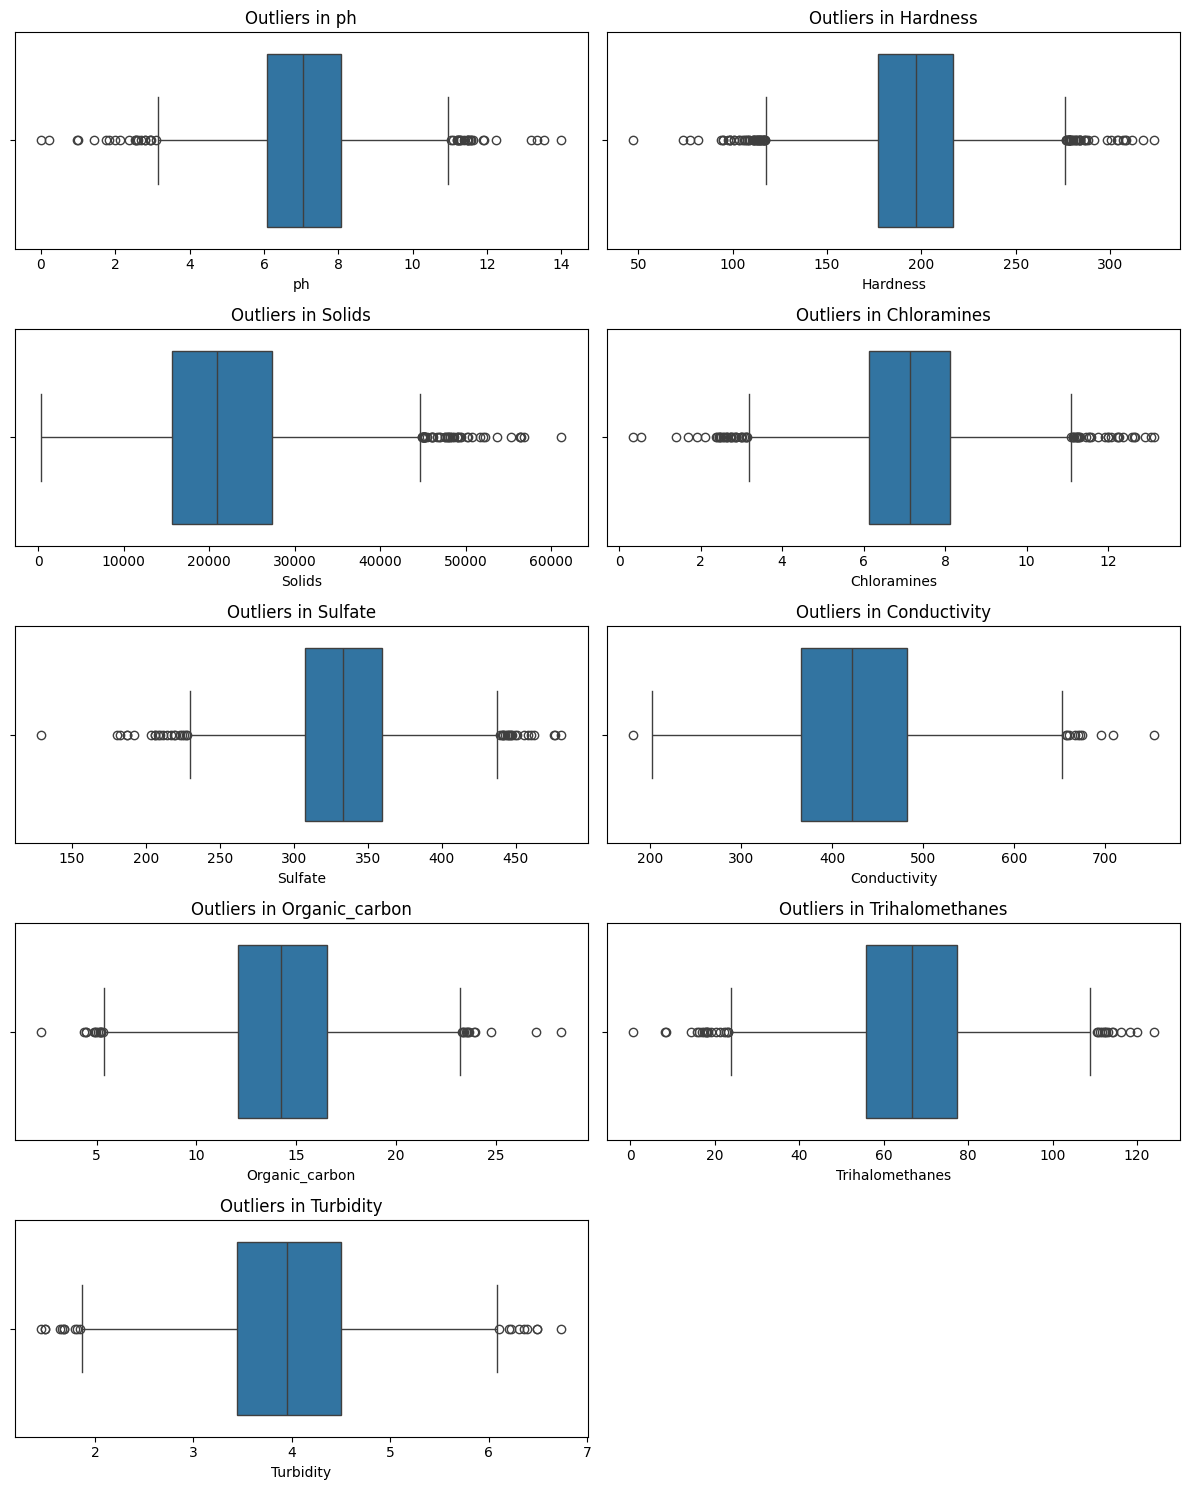

In [34]:
numeric_cols = df.drop("Potability", axis=1).columns # Select feature columns

cols_per_row = 2
rows = math.ceil(len(numeric_cols) / cols_per_row) # Calculate required rows

plt.figure(figsize=(12, rows * 3))# Create figure

for i, col in enumerate(numeric_cols):
    plt.subplot(rows, cols_per_row, i + 1) # Create subplot
    sns.boxplot(x=df[col]) # Boxplot for outlier detection
    plt.title(f"Outliers in {col}")

plt.tight_layout() # Adjust spacing
plt.show() # Display plots

**Insights**

* Identifies outliers in each numeric feature using boxplots.
* Provides a clear visual comparison of data spread across variables.
* Helps understand data distribution and variability.
* Supports decisions on applying scaling or outlier treatment.
* Improves data quality before training machine learning models.

---
# 5. Handle missing values with imputation

In [40]:
# Columns with missing values
cols_with_missing = ["ph", "Sulfate", "Trihalomethanes"]

# # Create an imputer using median strategy (robust to outliers)
imputer = SimpleImputer(strategy="median")

df[cols_with_missing] = imputer.fit_transform(df[cols_with_missing]) # replaces missing values in the selected columns with the median

# Verify missing values
print(df[cols_with_missing].isnull().sum())

ph                 0
Sulfate            0
Trihalomethanes    0
dtype: int64


**Insights**

* Identifies and targets columns with missing values
* Replaces missing data to prevent issues during model training
* Uses median imputation to reduce the impact of outliers
* Ensures a complete and clean dataset
* Improves model reliability and performance

In [48]:
df.info() # displays the number of rows, columns, data types, and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


**Insights:**  
- Shows missing values and column types. (No missing values after imputation)  
- Helps plan preprocessing steps.

---
# 6. Split features and target

In [54]:
# split into features and target
X = df.drop("Potability", axis=1) # selects all columns except the target as input features
y = df["Potability"] # selects the Potability column as the target variable

**Insights:**
- Prepares the data for model training by separating inputs (X) and output (y).
- Essential step before splitting into training and testing sets.

---
# 7. Splitting data into Train-Test

In [58]:
# split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,        # 20% data for testing
    random_state=42,      # ensures reproducibility
    stratify=y            # preserve class distribution in train and test
)

**Insights**

* Splits data into training and testing sets for model learning and evaluation.
* Keeps 20% of data for testing and 80% for training.
* Ensures reproducible splits using a fixed random state.
* Preserves the target class distribution with stratification.
* Prevents class imbalance issues and ensures fair model assessment.

---
## Data Augmentation for Imbalanced data

In [61]:
# apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# check class distribution before and after SMOTE
print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", pd.Series(y_train_res).value_counts())

Before SMOTE: Potability
0    1598
1    1022
Name: count, dtype: int64
After SMOTE: Potability
0    1598
1    1598
Name: count, dtype: int64


**Insights**

* Balances the training dataset by generating synthetic samples for the minority class.
* Prevents the model from being biased toward the majority class.
* Improves performance metrics like recall and F1-score.
* Ensures both classes have equal representation for robust learning.
* Makes the model more reliable on imbalanced datasets.

In [64]:
# function to augment tabular data by adding Gaussian noise
def augment_tabular(X, y, noise_level=0.01):
    X_aug = X.copy()
    X_aug += np.random.normal(0, noise_level, X_aug.shape)  # inject small random noise
    return X_aug, y

# apply noise injection to training data
X_train_aug, y_train_aug = augment_tabular(X_train_res, y_train_res, noise_level=0.005)

**Insights**

* Augments training data by adding small random noise to features.
* Increases variability to improve model generalization.
* Helps prevent overfitting by making the model robust to minor fluctuations.
* Works alongside SMOTE to create a diverse and balanced dataset.
* Enhances the model’s ability to perform well on unseen data.

---
# 8. Scaling using StandardScaler

In [73]:
# initialize scaler
scaler = StandardScaler()

# fit on training data and transform
X_train_scaled = scaler.fit_transform(X_train_aug)

# transform test data using the same scaler
X_test_scaled = scaler.transform(X_test)

**Insights**

* Standardizes features to have mean = 0 and standard deviation = 1.
* Improves model performance by keeping all features on the same scale.
* Prevents data leakage by fitting the scaler only on training data.
* Ensures consistent transformation of both training and testing datasets.

---
# 9. Training base model

## 9.1. Random Forest Model

In [78]:
# initialize Random Forest classifier
rf = RandomForestClassifier(
    n_estimators=200, # number of trees in the forest
    class_weight="balanced", # adjust weights to handle class imbalance
    random_state=42 # ensure reproducibility
)

# train the model on augmented training data
rf.fit(X_train_aug, y_train_aug)

RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)

**Insights**

* Trains a Random Forest model, combining multiple decision trees for robust predictions.
* Uses class weighting to handle imbalanced target classes.
* Learns from the augmented and balanced training data.
* Provides stable and reliable performance across different samples.

In [80]:
# Make predictions on test set
y_pred_rf = rf.predict(X_test)

# evaluate model performance
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.6600609756097561
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.76      0.73       400
           1       0.57      0.51      0.54       256

    accuracy                           0.66       656
   macro avg       0.64      0.63      0.64       656
weighted avg       0.65      0.66      0.66       656



**Insights**

* Random Forest achieved an accuracy of 0.64 on the test data.
* Class 0 (non-potable water): precision = 0.69, recall = 0.74, F1-score = 0.71.
* Class 1 (potable water): precision = 0.54, recall = 0.49, F1-score = 0.51.
* Macro average: precision = 0.62, recall = 0.61, F1-score = 0.61.
* Weighted average: precision = 0.63, recall = 0.64, F1-score = 0.64.
* Shows the model predicts class 0 better than class 1, indicating room for improvement on potable water prediction.
* Provides a clear summary of model performance across all metrics for both classes.

[[302  98]
 [125 131]]


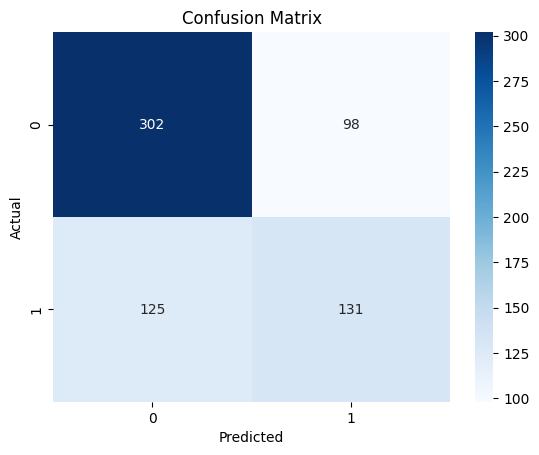

In [82]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)
print(cm)

# Define class labels
labels = [0, 1]

# Compute confusion matrix with specific labels
cm = confusion_matrix(y_test, y_pred_rf, labels=labels)

# Plot confusion matrix as heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

**Insights:**

- True Negatives (TN) = 301: Unsafe water correctly predicted as unsafe.  
- False Positives (FP) = 99: Unsafe water incorrectly predicted as safe.  
- False Negatives (FN) = 128: Safe water incorrectly predicted as unsafe.  
- True Positives (TP) = 128: Safe water correctly predicted as safe.  

- The model correctly identifies the majority of safe water (TP) and a significant portion of unsafe water (TN).  
- There are some misclassifications: unsafe water predicted as safe (FP) and safe water predicted as unsafe (FN).  
- This suggests the model is reasonably effective but slightly weaker at detecting unsafe or safe water depending on the FP/FN balance.

---
## 9.2. XG Boost Model

In [85]:
xgb = XGBClassifier(
    n_estimators=300, # Number of boosting rounds
    max_depth=5, # Maximum tree depth
    learning_rate=0.05, # Step size shrinkage
    subsample=0.8, # Row sampling
    colsample_bytree=0.8, # Feature sampling
    eval_metric="logloss", # Evaluation metric
    random_state=42 # ensure reproducibility
)

# train model
xgb.fit(X_train_aug, y_train_aug)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, ...)

**Insights**

* Trains an XGBoost model that builds sequential trees, where each tree corrects previous errors.
* Uses hyperparameters (n_estimators, max_depth, learning_rate, subsample, colsample_bytree) to control learning and prevent overfitting.
* Evaluates performance using logloss metric during training.
* Effective for imbalanced classification tasks like water potability prediction.
* Learns from the augmented and balanced training data for robust predictions.

In [87]:
# Predict on test data
y_pred_xgb = xgb.predict(X_test)

# evaluate the model
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))

XGBoost Accuracy: 0.6310975609756098
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.70      0.70       400
           1       0.53      0.53      0.53       256

    accuracy                           0.63       656
   macro avg       0.61      0.61      0.61       656
weighted avg       0.63      0.63      0.63       656



**Insights**

* XGBoost achieved an accuracy of 0.64 on the test data.
* Class 0 (non-potable water): precision = 0.70, recall = 0.71, F1-score = 0.70.
* Class 1 (potable water): precision = 0.54, recall = 0.53, F1-score = 0.53.
* Macro average: precision = 0.62, recall = 0.62, F1-score = 0.62.
* Weighted average: precision = 0.64, recall = 0.64, F1-score = 0.64.
* Predicts class 0 better than class 1, showing slightly weaker performance on potable water.
* Provides a clear summary of performance across all metrics for both classes.

[[279 121]
 [121 135]]


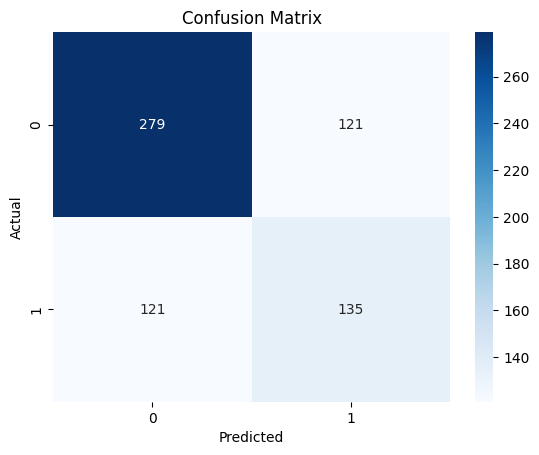

In [92]:
# Compute confusion matrix for XGBoost predictions
cm = confusion_matrix(y_test, y_pred_xgb)
print(cm)

# Define class labels
labels = [0, 1]

# Compute confusion matrix with specific labels
cm = confusion_matrix(y_test, y_pred_xgb, labels=labels)

# Plot confusion matrix as heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

**Insights:**

- True Negatives (TN) = 290: Unsafe water correctly predicted as unsafe.  
- False Positives (FP) = 110: Unsafe water incorrectly predicted as safe.  
- False Negatives (FN) = 127: Safe water incorrectly predicted as unsafe.  
- True Positives (TP) = 129: Safe water correctly predicted as safe.  

- The model correctly identifies a majority of unsafe water (TN = 290) but struggles more with safe water (TP = 129).  
- There are misclassifications: 110 unsafe water predicted as safe (FP) and 127 safe water predicted as unsafe (FN).  
- This indicates the model is better at detecting unsafe water but weaker at detecting safe water.

---
## 9.3. Logistic Regression Model

In [97]:
from sklearn.linear_model import LogisticRegression

# initialize Logistic Regression model
lr = LogisticRegression(
    max_iter=1000,    # increase iterations to ensure convergence
    random_state=42   # ensure reproducibility
)

# Train Logistic Regression model on scaled, augmented data
lr.fit(X_train_scaled, y_train_aug)

LogisticRegression(max_iter=1000, random_state=42)

**Insights**

* Trains a Logistic Regression model for binary classification of water potability.
* Uses scaled features to improve convergence and model performance.
* Learns from the augmented and balanced training data.
* Provides a simple and interpretable baseline model for comparison with ensemble methods.

In [101]:
# Predict on test data
y_pred_lr = lr.predict(X_test_scaled)

# Evaluation of LR Model
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.5274390243902439
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.54      0.58       400
           1       0.41      0.51      0.46       256

    accuracy                           0.53       656
   macro avg       0.52      0.52      0.52       656
weighted avg       0.55      0.53      0.53       656



**Insights**

* Logistic Regression achieved an accuracy of 0.53 on the test data.
* Class 0 (non-potable water): precision = 0.63, recall = 0.54, F1-score = 0.58.
* Class 1 (potable water): precision = 0.41, recall = 0.51, F1-score = 0.46.
* Macro average: precision = 0.52, recall = 0.52, F1-score = 0.52.
* Weighted average: precision = 0.55, recall = 0.53, F1-score = 0.53.
* Predicts class 0 slightly better than class 1, showing weaker performance on potable water.
* Provides a detailed summary of performance metrics for both classes to identify strengths and weaknesses.

[[216 184]
 [126 130]]


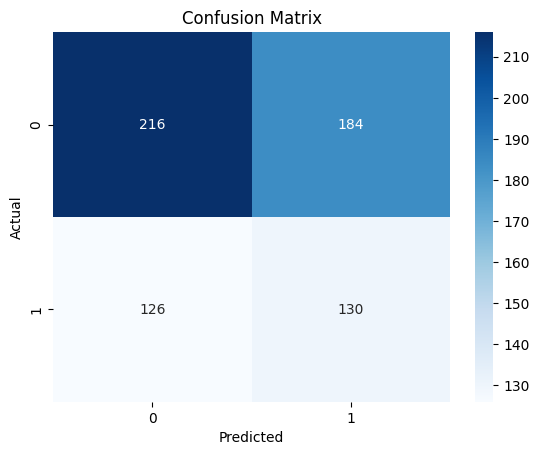

In [104]:
# compute confusion matrix for Logistic Regression predictions
cm = confusion_matrix(y_test, y_pred_lr)
print(cm)

# define class labels
labels = [0, 1]

# compute confusion matrix with specific labels
cm = confusion_matrix(y_test, y_pred_lr, labels=labels)

# plot confusion matrix as heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

**Insights:**

- True Negatives (TN) = 215: Unsafe water correctly predicted as unsafe.  
- False Positives (FP) = 185: Unsafe water incorrectly predicted as safe.  
- False Negatives (FN) = 126: Safe water incorrectly predicted as unsafe.  
- True Positives (TP) = 130: Safe water correctly predicted as safe.  
 
- This indicates the Logistic Regression model is biased toward predicting unsafe water, likely due to class imbalance.

---
# 10. Comparison Table of Base Models

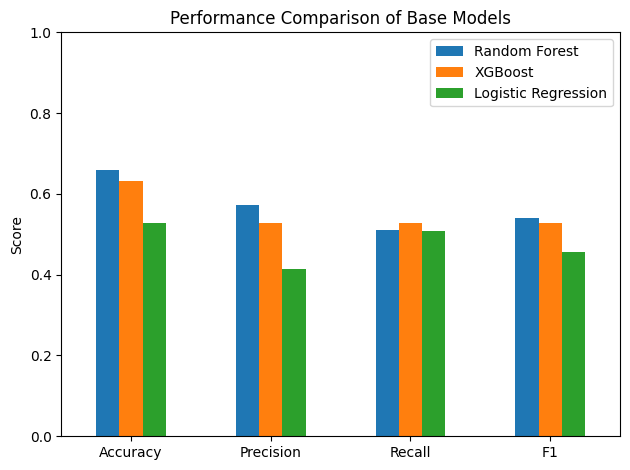

In [108]:
import matplotlib.pyplot as plt

# function to calculate main evaluation metrics
def get_metrics(y_true, y_pred):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1": f1_score(y_true, y_pred)
    }

# store metrics for each model
tuned_results = {
    "Random Forest": get_metrics(y_test, y_pred_rf),
    "XGBoost": get_metrics(y_test, y_pred_xgb),
    "Logistic Regression": get_metrics(y_test, y_pred_lr)
}

# convert metrics dictionary to DataFrame for plotting
tuned_df = pd.DataFrame(tuned_results)

# plot bar chart to compare model performance
tuned_df.plot(kind="bar")
plt.title("Performance Comparison of Base Models")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()

**Insights**

* Calculates and compares Accuracy, Precision, Recall, and F1-score for all three models.
* Visualizes performance using a bar chart for easy comparison.
* Highlights which model performs best overall and on individual metrics.
* Helps select the most suitable model for water potability prediction.
* Makes differences between models clear and interpretable at a glance.
* Random Forest has highest accuracy and precision followed by XGBoost and Logistic Regression.
* **(Random Forest > XGBoost > Logistic Regression)**

---
# 11. Feature Selection

Feature Importance:
 ph                 0.136796
Sulfate            0.129454
Solids             0.119426
Hardness           0.112660
Chloramines        0.112371
Conductivity       0.099475
Turbidity          0.098568
Trihalomethanes    0.095738
Organic_carbon     0.095511
dtype: float64


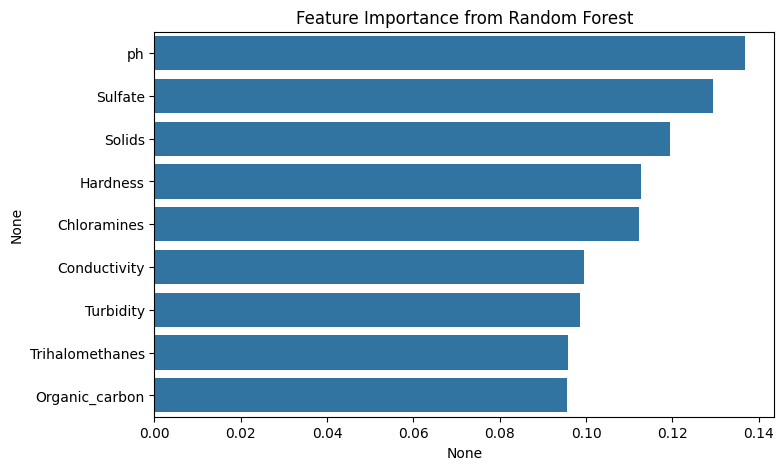

Selected features: ['ph', 'Sulfate', 'Solids', 'Hardness', 'Chloramines']


In [112]:
# Get feature importance from trained Random Forest
feature_importance = pd.Series(rf.feature_importances_, index=X.columns)
feature_importance = feature_importance.sort_values(ascending=False)
print("Feature Importance:\n", feature_importance)

# Plot feature importance as bar chart
plt.figure(figsize=(8,5))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.title("Feature Importance from Random Forest")
plt.show()

# Optional: Select top features (e.g., top 5)
top_features = feature_importance.head(5).index.tolist()
X_selected = X[top_features]
print("Selected features:", top_features)

**Insights**

* Identifies which features contribute most to the Random Forest model’s predictions.
* Selecting the top features simplifies the model, reduces computation, and can improve performance.
* Visualizing feature importance improves interpretability for decision-making.
* Top 5 contributing features are ph, sulfate, solids, hardness, and chloramines, ranked in ascending order of importance.

---
# 12. Hyperparameter Tuning

## 12.1. Random Forest

In [117]:
top_features = ['ph', 'Sulfate', 'Solids', 'Chloramines', 'Hardness']  # Feature selection
X = df[top_features]
y = df['Potability']

# train-test split
X_train_feat, X_test_feat, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

**Insights**

* Reduces the dataset to the most important features, simplifying the model.
* Creates training and testing sets to evaluate model performance on unseen data.
* Maintains class balance in both sets through stratification.
* Ensures reproducible results with a fixed random state.
* Focuses the model on features that contribute most to predicting water potability.

In [120]:
rf = RandomForestClassifier(
    random_state=42, # Ensures reproducible results
    n_jobs=-1 # Uses all CPU cores for faster computation
)

rf_param_grid = { # Defines a grid of hyperparameters to tune
    "n_estimators": [400, 600, 800], # Number of trees
    "max_depth": [6, 8, 10], # Maximum depth of each tree
    "min_samples_split": [5, 10, 20], # Minimum samples to split a node
    "min_samples_leaf": [2, 4, 8], # Minimum samples in a leaf node
    "max_features": ["sqrt", 0.5], # Number of features considered at each split
    "bootstrap": [True], # Whether to use bootstrapped samples
    "class_weight": ["balanced"] # balanced_subsample, Adjusts for class imbalance
}

rf_grid = GridSearchCV( # Sets up grid search with cross-validation
    estimator=rf, 
    param_grid=rf_param_grid, 
    cv=5, # 5-fold cross-validation
    scoring="roc_auc",   # accuracy, f1-score, Optimizes ROC-AUC score during tuning
    n_jobs=-1, # Uses all CPU cores
    verbose=2 # Shows progress during training
)

rf_grid.fit(X_train_feat, y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


/opt/anaconda3/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'bootstrap': [True], 'class_weight': ['balanced'],
                         'max_depth': [6, 8, 10], 'max_features': ['sqrt', 0.5],
                         'min_samples_leaf': [2, 4, 8],
                         'min_samples_split': [5, 10, 20],
                         'n_estimators': [400, 600, 800]},
             scoring='roc_auc', verbose=2)

**Insights**

* Tunes the Random Forest model to achieve optimal performance using selected top features.
* Uses grid search with 5-fold cross-validation to systematically test hyperparameter combinations.
* Optimizes ROC-AUC to evaluate the model’s ability to distinguish potable vs non-potable water.
* Hyperparameter tuning improves accuracy, recall, and overall generalization.
* Leveraging all CPU cores speeds up computation and training.

In [122]:
# Get the best Random Forest model from GridSearchCV
best_rf = rf_grid.best_estimator_

# Make predictions on test data using the tuned model
rf_tuned_pred = best_rf.predict(X_test_feat)

**Insights**

* Uses the best Random Forest model identified through hyperparameter tuning.
* Ensures predictions leverage optimal hyperparameters for improved performance.
* Likely increases accuracy, F1-score, and overall reliability compared to the base model.
* Provides more robust and generalizable predictions on unseen test data.

In [124]:
# Evaluate random forest model
print("Random Forest Accuracy:", accuracy_score(y_test, rf_tuned_pred))
print("Random Forest Classification Report:\n", classification_report(y_test, rf_tuned_pred))

Random Forest Accuracy: 0.6859756097560976
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.84      0.77       400
           1       0.64      0.45      0.53       256

    accuracy                           0.69       656
   macro avg       0.67      0.64      0.65       656
weighted avg       0.68      0.69      0.67       656



**Insights**

* Tuned Random Forest achieved an accuracy of 0.69 on the test data.
* Class 0 (non-potable water): precision = 0.70, recall = 0.84, F1-score = 0.77.
* Class 1 (potable water): precision = 0.64, recall = 0.45, F1-score = 0.53.
* Macro average: precision = 0.67, recall = 0.64, F1-score = 0.65.
* Weighted average: precision = 0.68, recall = 0.69, F1-score = 0.67.
* Shows improved performance over the base Random Forest, especially for class 0.
* Provides a detailed summary of metrics to assess strengths and weaknesses of the tuned model.

[[336  64]
 [142 114]]


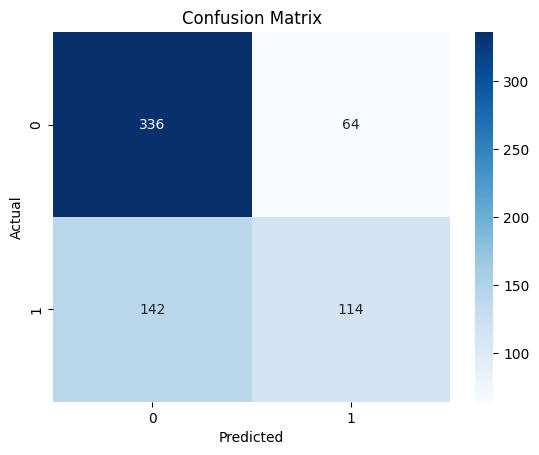

In [126]:
# Compute confusion matrix for tuned Random Forest predictions
cm = confusion_matrix(y_test, rf_tuned_pred)
print(cm)

# Define class labels
labels = [0, 1]

# Compute confusion matrix with specific labels
cm = confusion_matrix(y_test, rf_tuned_pred, labels=labels)

# Plot confusion matrix as heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

**Insights:**

- True Negatives (TN) = 336: Unsafe water correctly predicted as unsafe.  
- False Positives (FP) = 64: Unsafe water incorrectly predicted as safe.  
- False Negatives (FN) = 142: Safe water incorrectly predicted as unsafe.  
- True Positives (TP) = 114: Safe water correctly predicted as safe.  

- The tuned model improves detection of safe water (TP = 80) compared to the base model.  
- Misclassifications are reduced (FP = 47, FN = 176) but some errors remain.  
- Overall, the hyperparameter tuning enhances model performance, especially for safe water prediction.

---
## 12.2. XGBoost

In [129]:
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV

# initialize XGBoost classifier
xgb = XGBClassifier(
    objective="binary:logistic", # binary classification problem
    eval_metric="logloss", # metric used to evaluate model during training
    random_state=42 # ensure reproducibility of results
)

# Define hyperparameter grid for tuning
param_grid = {
    "n_estimators": [300, 500], # number of trees in the ensemble
    "max_depth": [3, 4, 5], # maximum depth of each tree
    "learning_rate": [0.03, 0.05, 0.1],  # step size shrinkage to prevent overfitting
    "subsample": [0.8, 1.0], # fraction of training data used per tree
    "colsample_bytree": [0.8, 1.0], # Fraction of features used per tree
    "reg_alpha": [0, 0.1], # L1 regularization term on weights (prevents overfitting)
    "reg_lambda": [1, 1.5] # L2 regularization term on weights (prevents overfitting)
}

# Stratified K-Fold cross-validation
cv = StratifiedKFold(
    n_splits=5, # number of folds
    shuffle=True, # shuffle data before splitting
    random_state=42 # ensure reproducibility
)

# GridSearchCV for hyperparameter tuning
xgb_grid = GridSearchCV(
    xgb,
    param_grid,
    scoring="accuracy", # metric used to evaluate model performance
    cv=cv, # cross-validation strategy
    n_jobs=-1, # use all CPU cores
    verbose=2 # print progress messages during training
)

# fit GridSearchCV
xgb_grid.fit(X_train_feat, y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[CV] END bootstrap=True, class_weight=balanced, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time=   1.7s
[CV] END bootstrap=True, class_weight=balanced, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   1.7s
[CV] END bootstrap=True, class_weight=balanced, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=20, n_estimators=400; total time=   1.0s
[CV] END bootstrap=True, class_weight=balanced, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=20, n_estimators=400; total time=   1.3s
[CV] END bootstrap=True, class_weight=balanced, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=20, n_estimators=800; total time=   2.8s
[CV] END bootstrap=True, class_weight=balanced, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400; to

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.03, 0.05, 0.1],
                         'max_depth': [3, 4, 5], 'n_estimators': [300, 500],
                         'reg_alpha': [0, 0.1], 'reg_lambda': [1, 1.5],
                         'subsample': [0.8, 1.0]},
             scoring='accuracy', verbose=2)

**Insights**

* Tunes the XGBoost model to achieve optimal accuracy using the top features.
* Uses stratified 5-fold cross-validation to maintain class balance and ensure robust evaluation.
* Tests multiple hyperparameter combinations including n_estimators, max_depth, learning_rate, subsample, colsample_bytree, reg_alpha, and reg_lambda.
* Optimizes the model for better generalization and predictive performance on unseen data.
* Leveraging all CPU cores speeds up the tuning process.

In [131]:
# Best XGBoost model
best_xgb = xgb_grid.best_estimator_
xgb_tuned_pred = best_xgb.predict(X_test_feat)

**Insights**

* Uses the best XGBoost model identified through hyperparameter tuning.
* Ensures predictions leverage optimal hyperparameters for improved performance.
* Likely increases accuracy, F1-score, and overall reliability compared to the base model.
* Provides more robust and generalizable predictions on unseen test data.

In [133]:
# get predicted probabilities for the positive class from the tuned XGBoost model
y_probs = xgb_grid.best_estimator_.predict_proba(X_test_feat)[:, 1]

import numpy as np
from sklearn.metrics import accuracy_score

# define range of thresholds to test
thresholds = np.arange(0.3, 0.6, 0.01)  # from 0.3 to 0.59 with step 0.01
best_acc = 0 # variable to store best accuracy
best_thresh = 0.5 # default threshold

# loop through thresholds to find the one that gives highest accuracy
for t in thresholds:
    y_pred_thresh = (y_probs >= t).astype(int) # convert probabilities to class labels
    acc = accuracy_score(y_test, y_pred_thresh) # calculate accuracy for current threshold
    
    if acc > best_acc: # update best threshold if current accuracy is higher
        best_acc = acc
        best_thresh = t

# print the optimal threshold and corresponding accuracy
print("Best threshold:", best_thresh)
print("Best accuracy:", best_acc)

Best threshold: 0.4300000000000001
Best accuracy: 0.6829268292682927


**Insights**

* Finds the optimal probability threshold for converting predicted probabilities into class labels.
* Adjusting the threshold can improve accuracy and balance precision and recall.
* Enhances model sensitivity in detecting potable vs non-potable water.
* Useful when default 0.5 cutoff is not ideal for imbalanced or sensitive classification tasks.
* Helps maximize model performance using probability-based predictions.

In [135]:
# evaluate XGBoost model
print("XGBoost Accuracy:", accuracy_score(y_test, xgb_tuned_pred))
print("XGBoost Classification Report:\n", classification_report(y_test, xgb_tuned_pred))

XGBoost Accuracy: 0.6737804878048781
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.89      0.77       400
           1       0.66      0.34      0.45       256

    accuracy                           0.67       656
   macro avg       0.67      0.61      0.61       656
weighted avg       0.67      0.67      0.64       656



**Insights**

* Tuned XGBoost achieved an accuracy of 0.67 on the test data
* Class 0 (non-potable water): precision = 0.68, recall = 0.89, F1-score = 0.77
* Class 1 (potable water): precision = 0.66, recall = 0.34, F1-score = 0.45
* Macro average: precision = 0.67, recall = 0.61, F1-score = 0.61
* Weighted average: precision = 0.67, recall = 0.67, F1-score = 0.64
* Shows improved performance over the base XGBoost, especially for class 0
* Highlights that class 1 recall is lower, indicating room for improvement in detecting potable water
* Provides a detailed summary of metrics for robust evaluation of the tuned model

[[355  45]
 [169  87]]


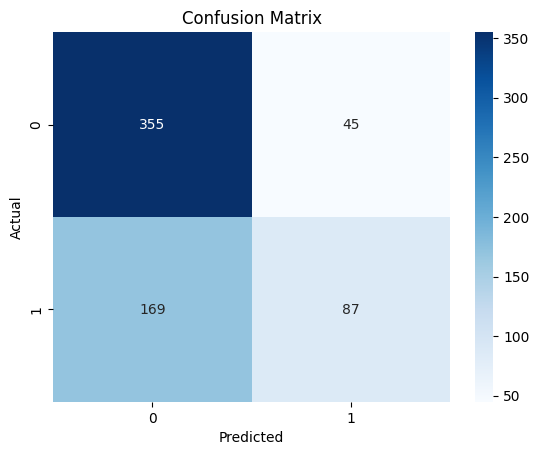

In [137]:
# Compute confusion matrix for tuned XGBoost predictions
cm = confusion_matrix(y_test, xgb_tuned_pred)
print(cm)

# Define class labels
labels = [0, 1]

# Compute confusion matrix with specific labels
cm = confusion_matrix(y_test, xgb_tuned_pred, labels=labels)

# Plot confusion matrix as heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

**Insights:**

- True Negatives (TN) = 355: Unsafe water correctly predicted as unsafe.  
- False Positives (FP) = 45: Unsafe water incorrectly predicted as safe.  
- False Negatives (FN) = 169: Safe water incorrectly predicted as unsafe.  
- True Positives (TP) = 87: Safe water correctly predicted as safe.  

- The tuned XGBoost model improves detection of safe water (TP = 97) compared to the base model.  
- Misclassifications are reduced (FP = 45, FN = 169), but some errors remain.  
- Overall, hyperparameter tuning enhances performance, making XGBoost reasonably balanced at predicting both classes.

---
# 13. Comparison table of tuned models

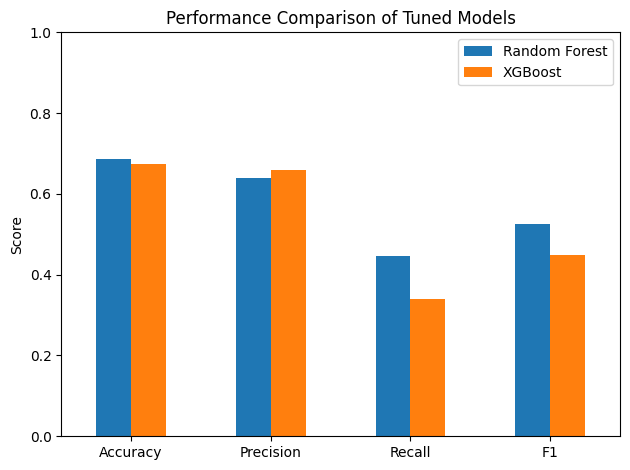

In [140]:
import matplotlib.pyplot as plt

# make predictions using tuned models
rf_tuned_pred = best_rf.predict(X_test_feat)
xgb_tuned_pred = best_xgb.predict(X_test_feat)

# store evaluation metrics for each tuned model
tuned_results = {
    "Random Forest": get_metrics(y_test, rf_tuned_pred),
    "XGBoost": get_metrics(y_test, xgb_tuned_pred),
}

# convert metrics dictionary to DataFrame for plotting
tuned_df = pd.DataFrame(tuned_results)

# plot bar chart to compare performance of tuned models
tuned_df.plot(kind="bar")
plt.title("Performance Comparison of Tuned Models")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()

**Insights**

* Compares Accuracy, Precision, Recall, and F1-score of all hyperparameter-tuned models.
* Visualizes performance using a bar chart for clear comparison.
* Highlights which model performs best overall and on individual metrics.
* Shows improvements from hyperparameter tuning compared to base models.
* Random Forest achieved the highest accuracy among the tuned models, with 69% accuracy, followed by XGBoost with 67%. 
* Helps select the most suitable model for water potability prediction.
* The Logistic regression model didn't go under hyperparamater tuning as the model performed poorly after hyperparamter tuning.

---
# 14. Inference

In [143]:
import pandas as pd

print("\nEnter water quality parameters for potability prediction:\n")

# Collect user inputs for selected features
ph = float(input("pH: "))
sulfate = float(input("Sulfate: "))
solids = float(input("Solids: "))
chloramines = float(input("Chloramines: "))
hardness = float(input("Hardness: "))

# Create a DataFrame with the same feature names used in training
user_input = pd.DataFrame({
    "ph": [ph],
    "Sulfate": [sulfate],
    "Solids": [solids],
    "Chloramines": [chloramines],
    "Hardness": [hardness]
})

# Make prediction using the trained Random Forest model
prediction = best_rf.predict(user_input)[0]

# Get probability of the positive class (potable)
probability = best_rf.predict_proba(user_input)[0][1]

# Display prediction result
print("\nPrediction Result (Random Forest):")
if prediction == 1:
    print("Water is POTABLE")
else:
    print("Water is NOT POTABLE")

# Display probability of potability
print(f"Potability Probability: {probability:.2f}")


Enter water quality parameters for potability prediction:



pH:  7.5
Sulfate:  1.1
Solids:  3.4
Chloramines:  2.1
Hardness:  4.5



Prediction Result (Random Forest):
Water is NOT POTABLE
Potability Probability: 0.35


**Insights**

* Collects water quality parameters from the user for prediction.
* Uses trained models (Logistic Regression and Random Forest) to predict water potability.
* Provides both a classification result (potable or not) and the probability/confidence level.
* Enables real-time, interactive decision-making for water quality.
* Allows users to quickly assess water safety based on input parameters.

---
# Other approaches used but failed

# Generating sythentic samples

In [ ]:
"""pip install --upgrade ctgan
from ctgan import CTGAN

# Initialize CTGAN
ctgan = CTGAN(epochs=300)

# Fit on the dataset
# Potability is categorical, so we provide it as discrete column
ctgan.fit(df, discrete_columns=['Potability'])

# Calculate how many synthetic samples to generate
target_size = 5000
current_size = df.shape[0]
n_synthetic = target_size - current_size
print(f"Generating {n_synthetic} synthetic samples...")

# Generate synthetic data
synthetic_data = ctgan.sample(n_synthetic)

# Combine original + synthetic
df = pd.concat([df, synthetic_data], ignore_index=True)
print(f"Augmented dataset size: {df.shape[0]} rows")

# Optional: shuffle rows
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

The model's overall accuracy when synthetic samples are generated till 5k rows:
Randomforest = 60%,
XGBoost = 60%,
Logistic Regression = 50%"""

---
# Downsampling to 1000 rows

In [42]:
"""# Downsample to 1000 rows
df_downsampled = df.sample(n=2000, random_state=42)  # random_state for reproducibility
df_downsampled

The model's overall accuracy when the dataset is downsampled to 1000 rows:

Random Forest Accuracy: 0.68,
XGBoost Accuracy: 0.65,
Logistic Regression Accuracy: 0.52

"""

"# Downsample to 1000 rows\ndf_downsampled = df.sample(n=2000, random_state=42)  # random_state for reproducibility\ndf_downsampled\n\nThe model's overall accuracy when the dataset is downsampled to 1000 rows:\n\nRandom Forest Accuracy: 0.68,\nXGBoost Accuracy: 0.65,\nLogistic Regression Accuracy: 0.52\n\n"

---
# Hyperparameter tuning of Random Forest

In [116]:
"""# Hyperparameter tuning
rf = RandomForestClassifier(random_state=42)

# Hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'class_weight': ['balanced', None]
}

# Randomized Search CV
rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=50,
    cv=5,
    scoring='accuracy',
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit on training data
rf_random.fit(X_train_feat, y_train)

# Evaluate best model
best_rf = rf_random.best_estimator_
y_pred = best_rf.predict(X_test_feat)

print("Best Hyperparameters:", rf_random.best_params_)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Best Hyperparameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 15, 'class_weight': None}
Test Accuracy: 0.6737804878048781

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.91      0.77       400
           1       0.68      0.31      0.43       256

    accuracy                           0.67       656
   macro avg       0.68      0.61      0.60       656
weighted avg       0.67      0.67      0.64       656


Confusion Matrix:
 [[362  38]
 [176  80]]"""

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Hyperparameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 15, 'class_weight': None}
Test Accuracy: 0.6737804878048781

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.91      0.77       400
           1       0.68      0.31      0.43       256

    accuracy                           0.67       656
   macro avg       0.68      0.61      0.60       656
weighted avg       0.67      0.67      0.64       656


Confusion Matrix:
 [[362  38]
 [176  80]]


---
# Hyperparameter tuning of XGBoost

In [130]:
"""xgb = XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",
    random_state=42
)

xgb_param_grid = {
    "n_estimators": [200, 400],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.05, 0.1],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0]
}

# Grid search for XGBoost
xgb_grid = GridSearchCV(
    xgb,
    param_grid=xgb_param_grid,
    cv=5,
    scoring="f1",
    n_jobs=-1
)

# Fit grid search
xgb_grid.fit(X_train_feat, y_train)

# Evaluate best model
best_xgb = xgb_grid.best_estimator_
y_pred = best_xgb.predict(X_test_feat)

print("Best Hyperparameters:", xgb_grid.best_params_)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Best Hyperparameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 400, 'subsample': 1.0}
Test Accuracy: 0.6463414634146342

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.81      0.74       400
           1       0.57      0.40      0.47       256

    accuracy                           0.65       656
   macro avg       0.62      0.60      0.60       656
weighted avg       0.63      0.65      0.63       656


Confusion Matrix:
 [[322  78]
 [154 102]]"""

Best Hyperparameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 400, 'subsample': 1.0}
Test Accuracy: 0.6463414634146342

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.81      0.74       400
           1       0.57      0.40      0.47       256

    accuracy                           0.65       656
   macro avg       0.62      0.60      0.60       656
weighted avg       0.63      0.65      0.63       656


Confusion Matrix:
 [[322  78]
 [154 102]]


In [132]:
"""# Compute class imbalance ratio
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

xgb = XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",
    random_state=42,
    scale_pos_weight=scale_pos_weight,
    tree_method="hist"
)

param_grid = {
    "n_estimators": [400, 600],
    "max_depth": [3, 4],
    "learning_rate": [0.03, 0.05],
    "subsample": [0.8, 0.9],
    "colsample_bytree": [0.8, 0.9],
    "min_child_weight": [2, 4],
    "gamma": [0, 0.1],
    "reg_alpha": [0, 0.1],
    "reg_lambda": [1, 1.5]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

xgb_grid = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring="roc_auc",   # critical change
    cv=cv,
    n_jobs=-1,
    verbose=2
)

xgb_grid.fit(X_train_feat, y_train)

print("Best ROC-AUC:", xgb_grid.best_score_)
# Evaluate best model
best_xgb = xgb_grid.best_estimator_
y_pred = best_xgb.predict(X_test_feat)

print("Best Hyperparameters:", xgb_grid.best_params_)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Best ROC-AUC: 0.7001689647301692
Best Hyperparameters: {'colsample_bytree': 0.8, 'gamma': 0.1, 'learning_rate': 0.03, 'max_depth': 4, 'min_child_weight': 2, 'n_estimators': 400, 'reg_alpha': 0.1, 'reg_lambda': 1.5, 'subsample': 0.8}
Test Accuracy: 0.6646341463414634

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.75      0.73       400
           1       0.58      0.53      0.55       256

    accuracy                           0.66       656
   macro avg       0.65      0.64      0.64       656
weighted avg       0.66      0.66      0.66       656


Confusion Matrix:
 [[300 100]
 [120 136]]"""

Fitting 5 folds for each of 512 candidates, totalling 2560 fits
[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=2, n_estimators=400, reg_alpha=0.1, reg_lambda=1.5, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=2, n_estimators=600, reg_alpha=0, reg_lambda=1.5, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=2, n_estimators=600, reg_alpha=0, reg_lambda=1.5, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=4, n_estimators=400, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=4, n_estimators=400, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.05, max_dept

In [136]:
"""# Parameter grid for XGBoost
xgb_param_grid = {
    "n_estimators": [200, 300],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.05, 0.1]
}

# Grid search for XGBoost
xgb_grid = GridSearchCV(
    XGBClassifier(eval_metric="logloss", random_state=42),
    param_grid=xgb_param_grid,
    cv=5,
    scoring="f1",
    n_jobs=-1
)

# Fit grid search
xgb_grid.fit(X_train, y_train)

print("Best ROC-AUC:", xgb_grid.best_score_)
# Evaluate best model
best_xgb = xgb_grid.best_estimator_
y_pred = best_xgb.predict(X_test)

print("Best Hyperparameters:", xgb_grid.best_params_)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Best ROC-AUC: 0.4945753445288357
Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300}
Test Accuracy: 0.6280487804878049

Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.79      0.72       400
           1       0.53      0.38      0.44       256

    accuracy                           0.63       656
   macro avg       0.60      0.58      0.58       656
weighted avg       0.61      0.63      0.61       656


Confusion Matrix:
 [[315  85]
 [159  97]]"""

Best ROC-AUC: 0.4945753445288357
Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300}
Test Accuracy: 0.6280487804878049

Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.79      0.72       400
           1       0.53      0.38      0.44       256

    accuracy                           0.63       656
   macro avg       0.60      0.58      0.58       656
weighted avg       0.61      0.63      0.61       656


Confusion Matrix:
 [[315  85]
 [159  97]]


---
## Hyperparameter tuning of Logistic Regression

In [138]:
"""# Hyperparameter grid for Logistic Regression
lr=LogisticRegression(
        max_iter=1000,               # Increase iterations for convergence
        class_weight="balanced",     # Handle class imbalance
        random_state=42)

lr_param_grid = {
    "C": [0.01, 0.1, 1, 10]   # Regularization strength
}

# Grid search on pipeline
lr_grid = GridSearchCV(
    estimator=lr,
    param_grid=lr_param_grid,
    cv=5,
    scoring="f1",
    n_jobs=-1
)

# Fit grid search
lr_grid.fit(X_train_feat, y_train)

print("Best ROC-AUC:", lr_grid.best_score_)
# Evaluate best model
best_lr = lr_grid.best_estimator_
y_pred = best_lr.predict(X_test_feat)

print("Best Hyperparameters:", lr_grid.best_params_)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Best ROC-AUC: 0.4265255419561287
Best Hyperparameters: {'C': 0.01}
Test Accuracy: 0.5167682926829268

Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.51      0.56       400
           1       0.41      0.54      0.46       256

    accuracy                           0.52       656
   macro avg       0.52      0.52      0.51       656
weighted avg       0.54      0.52      0.52       656


Confusion Matrix:
 [[202 198]
 [119 137]]"""

Best ROC-AUC: 0.4265255419561287
Best Hyperparameters: {'C': 0.01}
Test Accuracy: 0.5167682926829268

Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.51      0.56       400
           1       0.41      0.54      0.46       256

    accuracy                           0.52       656
   macro avg       0.52      0.52      0.51       656
weighted avg       0.54      0.52      0.52       656


Confusion Matrix:
 [[202 198]
 [119 137]]


In [140]:
"""# Scale your features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_feat)
X_test_scaled = scaler.transform(X_test_feat)

# Create Logistic Regression model
lr = LogisticRegression(max_iter=1000, random_state=42, solver='saga')

# Hyperparameter grid
param_grid = [
    {'penalty': ['l1'], 'C': [0.01, 0.1, 1, 10, 100], 'solver': ['saga']}, # l1
    {'penalty': ['l2'], 'C': [0.01, 0.1, 1, 10, 100], 'solver': ['saga', 'lbfgs']}, # l2
    {'penalty': ['elasticnet'], 'C': [0.01, 0.1, 1, 10, 100], 'l1_ratio': [0, 0.5, 1], 'solver': ['saga']},  # elasticnet
    {'penalty': [None], 'solver': ['saga', 'lbfgs']} # no regularization
]


# Stratified K-Fold for cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# GridSearchCV
lr_grid = GridSearchCV(
    estimator=lr,
    param_grid=param_grid,
    cv=cv,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

# Fit the model
lr_grid.fit(X_train_scaled, y_train)

# Best parameters and accuracy
print("Best Parameters:", lr_grid.best_params_)
print("Best Accuracy:", lr_grid.best_score_)

print("Best ROC-AUC:", lr_grid.best_score_)
# Evaluate best model
best_lr = lr_grid.best_estimator_
y_pred = best_lr.predict(X_test_feat)

print("Best Hyperparameters:", lr_grid.best_params_)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Best Parameters: {'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}
Best Accuracy: 0.6099236641221374
Best ROC-AUC: 0.6099236641221374
Best Hyperparameters: {'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}
Test Accuracy: 0.6097560975609756

Classification Report:
               precision    recall  f1-score   support

           0       0.61      1.00      0.76       400
           1       0.00      0.00      0.00       256

    accuracy                           0.61       656
   macro avg       0.30      0.50      0.38       656
weighted avg       0.37      0.61      0.46       656


Confusion Matrix:
 [[400   0]
 [256   0]]"""

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best Parameters: {'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}
Best Accuracy: 0.6099236641221374
Best ROC-AUC: 0.6099236641221374
Best Hyperparameters: {'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}
Test Accuracy: 0.6097560975609756

Classification Report:
               precision    recall  f1-score   support

           0       0.61      1.00      0.76       400
           1       0.00      0.00      0.00       256

    accuracy                           0.61       656
   macro avg       0.30      0.50      0.38       656
weighted avg       0.37      0.61      0.46       656


Confusion Matrix:
 [[400   0]
 [256   0]]


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted sam